<a href="https://colab.research.google.com/github/subreto-roy/ATM_DATA_ANALYSIS/blob/main/ATM_Transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#import data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data  = '/content/drive/MyDrive/Colab Notebooks/atm_transactions.csv'
data = pd.read_csv(data)

In [ ]:
print(data.head())

       atmId                  atmName atmCity  \
0  atm350000          ALİAĞA BAĞLI ŞB   Izmir   
1  atm350001  ALİAĞA İSTİKLAL CADDESİ   Izmir   
2  atm350002         ALİAĞA PAZARYERİ   Izmir   
3  atm350003       ALİAĞA SAHİL PARKI   Izmir   
4  atm350004            ALİAĞA ŞUBE-1   Izmir   

                         atmAddress  totalBalance  numberIncomeTransaction  \
0           Aliağa Petkim Tesisleri         40000                        0   
1        ATATÜRK İSTİKLAL CD. NO:97         40000                        0   
2        ALİAĞA KAPALI PAZAR GİRİŞİ         40000                        0   
3  ALİAĞA HİKMET CD.SAHİL PARKI ÖNÜ         40000                        0   
4       İstiklal Caddesi No: 64 / A         40000                        0   

   numberOutcomeTransaction  totalIncome  totalOutcome  \
0                         0            0             0   
1                         0            0             0   
2                         0            0             0   
3   

In [ ]:
data.columns

Index(['atmId', 'atmName', 'atmCity', 'atmAddress', 'totalBalance',
       'numberIncomeTransaction', 'numberOutcomeTransaction', 'totalIncome',
       'totalOutcome', 'totalNumberTransaction', 'day', 'transactionTime'],
      dtype='object')

In [ ]:
data['transactionTime'] = pd.to_datetime(data['transactionTime'])

In [ ]:
data['Hour'] = data['transactionTime'].dt.hour

In [ ]:
transactions_per_hour = data.groupby('Hour').size()

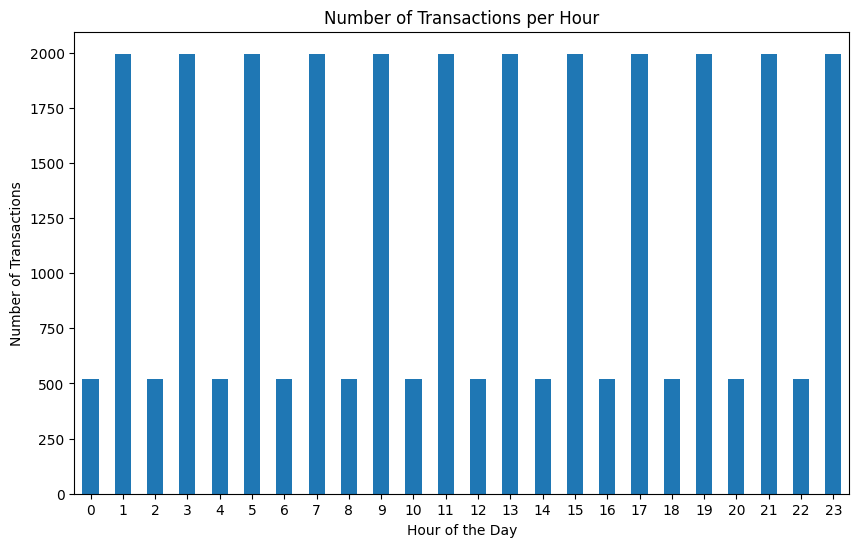

In [ ]:
plt.figure(figsize=(10, 6))
transactions_per_hour.plot(kind='bar')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions per Hour')
plt.xticks(rotation=0)
plt.show()

In [ ]:
peak_hour = transactions_per_hour.idxmax()
max_transactions = transactions_per_hour.max()

In [ ]:
print(f'The hour with the most transactions is {peak_hour}:00 with {max_transactions} transactions.')

The hour with the most transactions is 1:00 with 1995 transactions.


In [ ]:
transactions_per_atm = data.groupby('atmId').size()


peak_atm_id = transactions_per_atm.idxmax()
max_transactions = transactions_per_atm.max()

print(f'The ATM ID with the most transactions is {peak_atm_id} with {max_transactions} transactions.')

The ATM ID with the most transactions is atm350000 with 84 transactions.


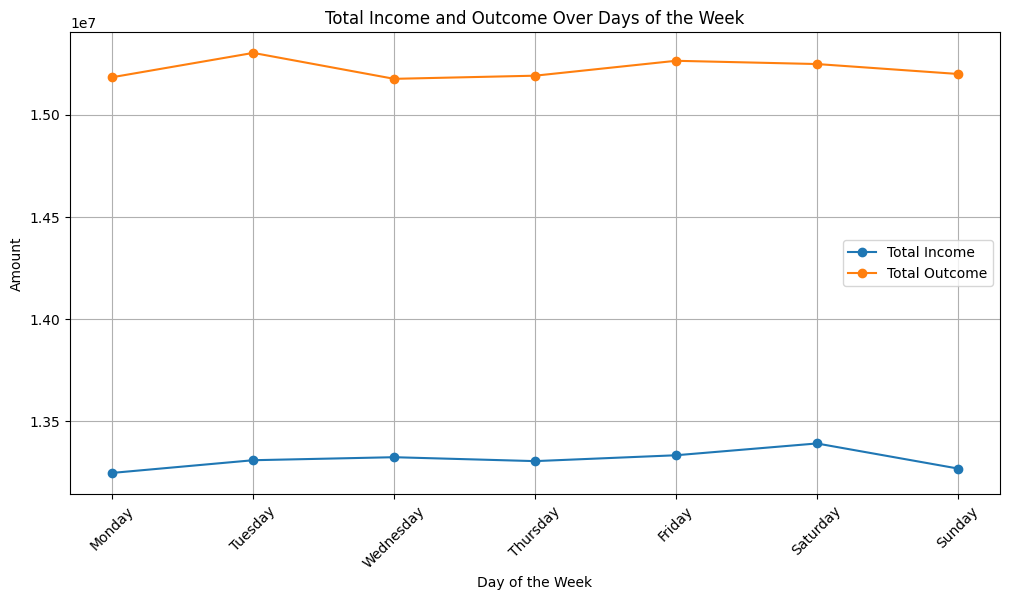

In [ ]:
#Cash Flow Patterns
data['transactionTime'] = pd.to_datetime(data['transactionTime'])
data['DayOfWeek'] = data['transactionTime'].dt.day_name()


income_per_day = data.groupby('DayOfWeek')['totalIncome'].sum()
outcome_per_day = data.groupby('DayOfWeek')['totalOutcome'].sum()


days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
income_per_day = income_per_day.reindex(days_order)
outcome_per_day = outcome_per_day.reindex(days_order)


plt.figure(figsize=(12, 6))

plt.plot(income_per_day.index, income_per_day, label='Total Income', marker='o')
plt.plot(outcome_per_day.index, outcome_per_day, label='Total Outcome', marker='o')

plt.xlabel('Day of the Week')
plt.ylabel('Amount')
plt.title('Total Income and Outcome Over Days of the Week')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

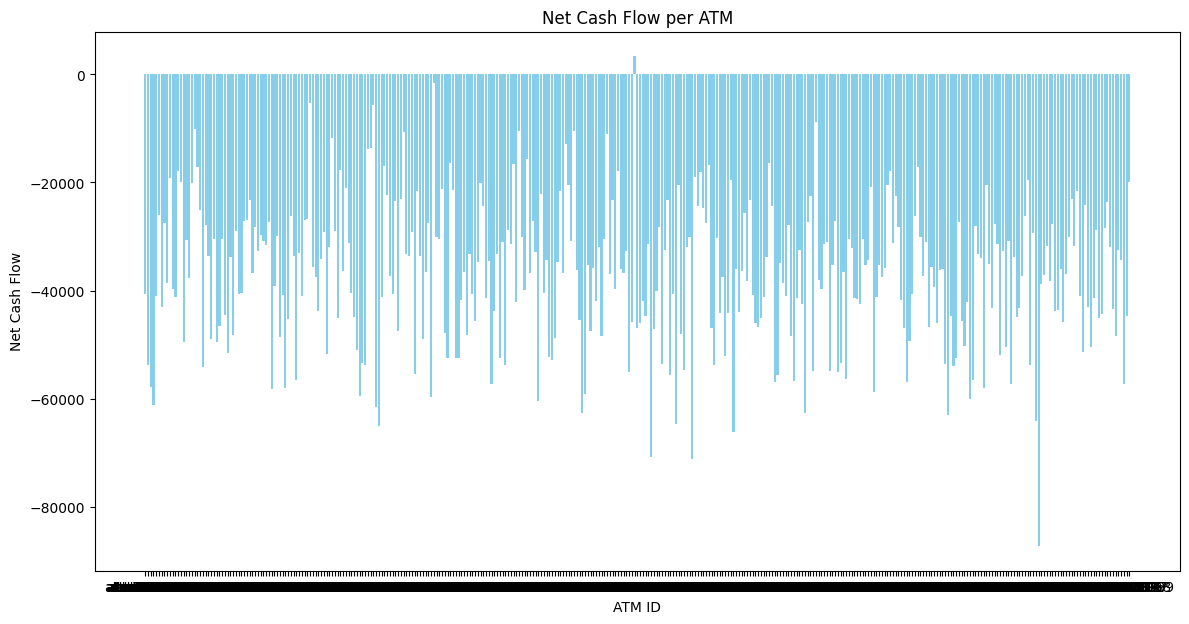

The ATM with the highest net cash flow is atm35000259 with a net cash flow of 3365.
The ATM with the lowest net cash flow is atm3500069 with a net cash flow of -87300.


In [ ]:
#Net Cash Flow
data['netCashFlow'] = data['totalIncome'] - data['totalOutcome']
net_cash_flow_per_atm = data.groupby('atmId')['netCashFlow'].sum().reset_index()


plt.figure(figsize=(14, 7))
plt.bar(net_cash_flow_per_atm['atmId'], net_cash_flow_per_atm['netCashFlow'], color='skyblue')
plt.xlabel('ATM ID')
plt.ylabel('Net Cash Flow')
plt.title('Net Cash Flow per ATM')
plt.show()


max_net_cash_flow_atm = net_cash_flow_per_atm.loc[net_cash_flow_per_atm['netCashFlow'].idxmax()]
min_net_cash_flow_atm = net_cash_flow_per_atm.loc[net_cash_flow_per_atm['netCashFlow'].idxmin()]

print(f'The ATM with the highest net cash flow is {max_net_cash_flow_atm["atmId"]} with a net cash flow of {max_net_cash_flow_atm["netCashFlow"]}.')
print(f'The ATM with the lowest net cash flow is {min_net_cash_flow_atm["atmId"]} with a net cash flow of {min_net_cash_flow_atm["netCashFlow"]}.')

In [ ]:
transactions_per_atm = data.groupby('atmId')['totalNumberTransaction'].sum().reset_index()
most_used_atm = transactions_per_atm.loc[transactions_per_atm['totalNumberTransaction'].idxmax()]

print(f'The most used ATM is {most_used_atm["atmId"]} with {most_used_atm["totalNumberTransaction"]} transactions.')


The most used ATM is atm3500087 with 14554 transactions.


In [ ]:
transactions_per_city = data.groupby('atmCity')['totalNumberTransaction'].sum().reset_index()
most_used_city = transactions_per_city.loc[transactions_per_city['totalNumberTransaction'].idxmax()]

print(f'The city with the most ATM transactions is {most_used_city["atmCity"]} with {most_used_city["totalNumberTransaction"]} transactions.')



The city with the most ATM transactions is Izmir with 3113458 transactions.
